In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import yfinance as yf
import math
import os.path
import time

In [3]:
cryptocurrencies = ['ETH-USD']
ethereum_df = yf.download(cryptocurrencies, start='2019-01-01',
                end='2022-03-01', parse_dates = ['Month'])

[*********************100%***********************]  1 of 1 completed


In [6]:
ethereum_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,140.031067,140.181152,132.519394,133.368256,133.368256,2358360234
2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535


In [5]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1156 entries, 2018-12-31 to 2022-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1156 non-null   float64
 1   High       1156 non-null   float64
 2   Low        1156 non-null   float64
 3   Close      1156 non-null   float64
 4   Adj Close  1156 non-null   float64
 5   Volume     1156 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.2 KB


In [7]:
ethereum_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1.156000e+03
mean,1181.406335,1221.719500,1136.072278,1183.514517,1183.514517,1.611061e+10
std,1368.163032,1412.364387,1316.348971,1368.089893,1368.089893,1.105441e+10
min,104.645050,106.058876,95.184303,104.535301,104.535301,2.212109e+09
25%,181.450790,186.022289,178.142548,181.592022,181.592022,7.964691e+09
50%,328.231735,344.052414,316.364609,334.923355,334.923355,1.354823e+10
75%,2192.962219,2291.479309,2094.901428,2201.843323,2201.843323,2.084253e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,4812.087402,8.448291e+10


In [8]:
ethereum_df['Close'].max()

4812.08740234375

In [9]:
ethereum_df['Close'].min()

104.5353012084961

In [10]:
ethereum_df["Volume"] = ethereum_df["Volume"].astype("float")
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1156 entries, 2018-12-31 to 2022-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1156 non-null   float64
 1   High       1156 non-null   float64
 2   Low        1156 non-null   float64
 3   Close      1156 non-null   float64
 4   Adj Close  1156 non-null   float64
 5   Volume     1156 non-null   float64
dtypes: float64(6)
memory usage: 63.2 KB


In [11]:
ethereum_df = ethereum_df.drop(columns = ['Adj Close'])

In [12]:
ethereum_df.info()
print('\n')
print('Número de muestras', ethereum_df.shape[0])
print('Número de variables', ethereum_df.shape[1])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1156 entries, 2018-12-31 to 2022-02-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1156 non-null   float64
 1   High    1156 non-null   float64
 2   Low     1156 non-null   float64
 3   Close   1156 non-null   float64
 4   Volume  1156 non-null   float64
dtypes: float64(5)
memory usage: 54.2 KB


Número de muestras 1156
Número de variables 5


In [13]:
close = ethereum_df['Close']

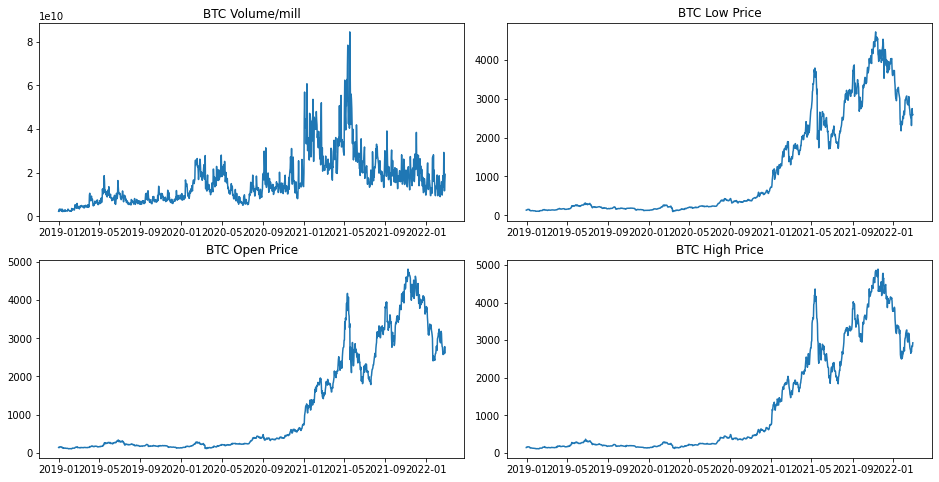

In [14]:
fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(ethereum_df['Volume'])
axs[0,0].set_title('BTC Volume/mill')
axs[0,1].plot(ethereum_df['Low'])
axs[0,1].set_title('BTC Low Price')
axs[1,0].plot(ethereum_df['Open'])
axs[1,0].set_title('BTC Open Price')
axs[1,1].plot(ethereum_df['High'])
axs[1,1].set_title('BTC High Price')

plt.show()

In [15]:
""" Vamos a medir la correlación entre las variables
 y comprobaremos a continuación cuáles son las más importantes 
 intentando conocer qué variables independientes
 afectan en mayor medida al modelo que vamos a utilizar. """

ethereum_features = ethereum_df
features = ['Open', 'High', 'Low', 'Volume']
X_ethereum = ethereum_features[features]
y_ethereum = ethereum_features['Close']  

In [16]:
ethereum_df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999235,0.998275,0.997827,0.522719
High,0.999235,1.000000,0.998152,0.998891,0.533453
Low,0.998275,0.998152,1.000000,0.998950,0.502328
Close,0.997827,0.998891,0.998950,1.000000,0.520086
Volume,0.522719,0.533453,0.502328,0.520086,1.000000


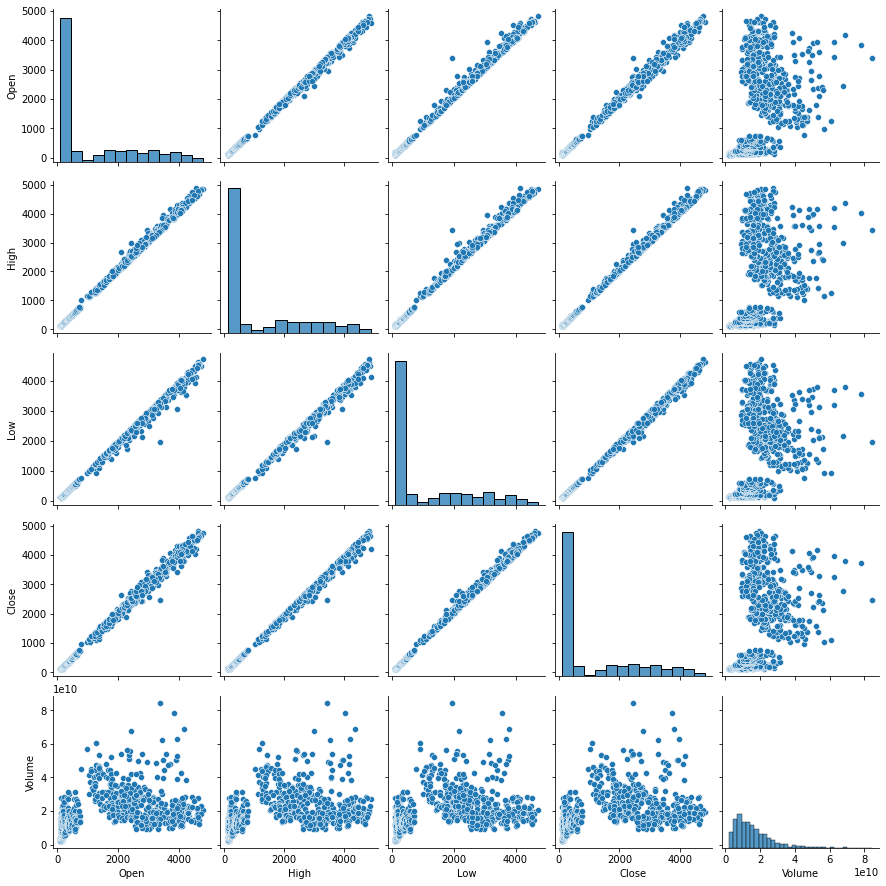

In [17]:
sns.pairplot(ethereum_df);

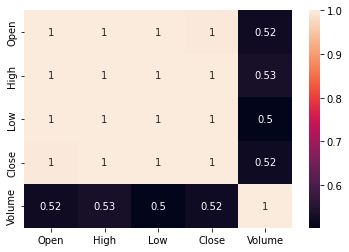

In [19]:
sns.heatmap(ethereum_df.corr(), annot=True);

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


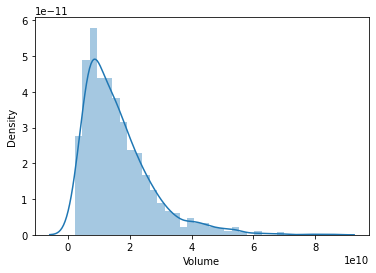

In [20]:
sns.distplot(ethereum_df['Volume']);

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


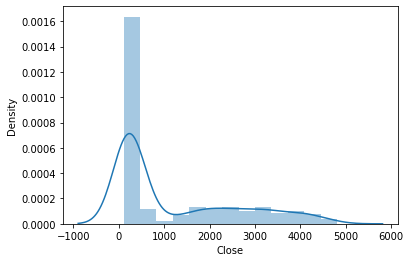

In [21]:
sns.distplot(ethereum_df['Close']);

## 1). MODELO DE REGRESIÓN LINEAL

In [22]:
X_ethereum.columns


Index(['Open', 'High', 'Low', 'Volume'], dtype='object')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ethereum, y_ethereum, test_size = 0.30, random_state = 42)

In [25]:
print("Total features shape:", X_ethereum.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (1156, 4)
Train features shape: (809, 4)
Train target shape: (809,)
Test features shape: (347, 4)
Test target shape: (347,)


In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
print('Intercepto:', lm.intercept_)
print('Coeficientes:', lm.coef_)

Intercepto: -0.6849623891234842
Coeficientes: [-5.41240529e-01  8.46976878e-01  6.91983103e-01  1.74577464e-10]


In [29]:
coeff_df = pd.DataFrame(lm.coef_,
                        X_ethereum.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Open,-5.412405e-01
High,8.469769e-01
Low,6.919831e-01
Volume,1.745775e-10


In [30]:
X_test

,Open,High,Low,Volume
Date,,,,
2021-07-28,2302.081299,2341.777832,2250.914062,1.899130e+10
2019-09-22,215.486557,216.086243,207.644928,7.812855e+09
2019-04-19,173.787888,173.978897,170.620209,6.541053e+09
2019-10-26,181.667068,195.942505,176.133804,1.383178e+10
2021-01-21,1382.684448,1382.684448,1098.476196,4.593246e+10
...,...,...,...,...
2020-10-15,379.192230,381.208771,371.354126,1.496418e+10
2021-05-22,2436.014648,2483.983154,2168.124268,4.208994e+10
2020-06-28,222.914490,228.598282,219.472672,6.205926e+09


In [31]:
predictions = lm.predict(X_test)
predictions

array([2297.67696675,  210.75576072,  171.81831451,  191.24456289,
       1190.19767328,  268.99054335, 2704.42455838,  228.06726912,
       2508.16752696,  408.43875726,  126.66421421,  186.56940092,
        248.6498695 , 2332.9540639 ,  169.46405083, 3688.93932598,
       1638.42422828, 3245.88019309, 3756.68481294, 3124.83424308,
       4248.29872431, 2614.45456488,  134.50530755,  230.77184278,
       1243.97634439,  343.46210093,  228.56506919,  144.76301619,
        184.91302143, 2929.92380245,  215.76589406,  159.84276014,
        145.37518805,  151.63712048, 3815.49447045,  246.33126464,
       2635.75935871, 2671.98516167, 1973.86512749,  181.50733422,
       2412.11470335, 4101.83711988, 3489.27362794,  352.28069841,
        314.67261179,  168.06613033, 2560.69567431, 1942.10711602,
        180.4143892 , 3308.86151144, 3495.55920413,  508.67843987,
        245.58419928,  140.05618324,  177.09708166, 1689.9742616 ,
        268.11726061,  129.96091065,  146.80541285,  117.18771

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


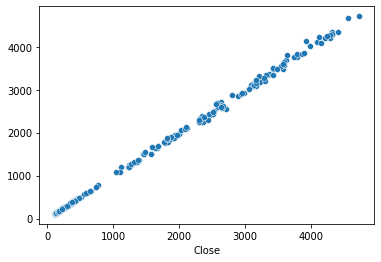

In [32]:
sns.scatterplot(y_test, predictions);

In [33]:
new_price = np.array([[1.5, 0.75, 2.20, 0.17],
                    [2, 0.60, 1.90, 0.01]])

lm.predict(new_price)

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.6607723 , 0.05551058])

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

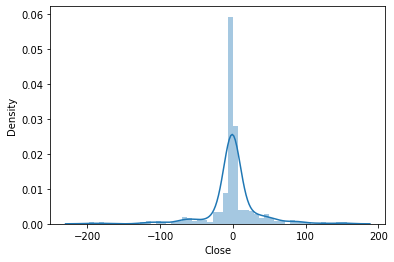

In [34]:
sns.distplot((y_test - predictions))

In [35]:
from sklearn import metrics

lm.score(X_test, y_test)


0.9993269032543671

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17.029730968078525
MSE: 1177.070809314251
RMSE: 34.30846556338903


In [37]:
intercept = lm.intercept_
features = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=True)

,coefficient
Open,-5.412405e-01
Volume,1.745775e-10
Low,6.919831e-01
High,8.469769e-01


In [38]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scal = std_scale.transform(X_train)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scal, y_train)

intercept_scal = lm_scal.intercept_
features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['Coefficient'])

features_std.sort_values('Coefficient', ascending=False)

,Coefficient
High,1211.564830
Low,921.977864
Volume,1.955334
Open,-749.519959


In [39]:
X = ethereum_df[['Open', 'High', 'Low', 'Volume']]

y = ethereum_df['Close']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

lr = LinearRegression(n_jobs=-1) 
lr.fit(X_train, y_train)

predictions = lm.predict(X_test)
predictions
lr.fit(X, y)

# A little bit lower without Avg. Area Number of Bedrooms
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17.029730968078525
MSE: 1177.070809314251
RMSE: 34.30846556338903


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [50]:
# Load libraries
import numpy as np
import pickle
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Set random seed
np.random.seed(42)

In [42]:
def my_function(df):
    df['columna1'] = SimpleImputer(strategy='mean')
    df['columna2'] = SimpleImputer(strategy='median')
    return df

In [43]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])
reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)
}

In [44]:
def preprocessing(df):
    df = imputacion(df)
    df = estandarizar(df)
    modelo.fit(df)
    return model

In [45]:
ethereum_df

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,140.031067,140.181152,132.519394,133.368256,2.358360e+09
2019-01-01,133.418152,141.397507,132.650711,140.819412,2.258710e+09
2019-01-02,141.519516,156.929138,140.650955,155.047684,3.328240e+09
2019-01-03,155.196045,155.863052,147.198364,149.135010,2.676165e+09
2019-01-04,148.912888,156.878983,147.907104,154.581940,3.126193e+09
...,...,...,...,...,...
2022-02-24,2588.166260,2689.047607,2308.914795,2598.067139,2.931234e+10
2022-02-25,2598.436279,2821.972412,2579.208008,2764.535645,1.720890e+10
2022-02-26,2764.989502,2849.424072,2745.009033,2781.111816,1.172465e+10


In [46]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    # ("funcion", my_function())
    ("reglog", LogisticRegression())
])

rand_forest = RandomForestClassifier()

svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])


reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)
}
rand_forest_param = {
    "n_estimators": [10, 100, 1000],
    "max_features": [1,2,3]
}
svm_param = {
    'selectkbest__k': [2, 3, 4],
    'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svm__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'svm__degree': [1,2,3,4],
    'svm__gamma': ['scale', 'auto']
}


gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

grids = {"gs_reg_log": gs_reg_log,
        "gs_rand_forest": gs_rand_forest,
        "gs_svm": gs_svm}

LogisticRegression(C=1, penalty='l2', solver='liblinear')

LogisticRegression(C=1, solver='liblinear')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [51]:
print(gs_reg_log.best_score_)
print(gs_reg_log.best_params_)
print(gs_reg_log.best_estimator_)
print(gs_reg_log.best_estimator_['reglog'])

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [52]:
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [53]:
def rmse(x, y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train),
                m.score(X_test, y_test)]
    print(f"RMSE Training Set: {res[0]} \nRMSE validation set: {res[1]} \nR2 validation set: {res[3]}")

In [54]:
modelo_defecto  = RandomForestRegressor(random_state = 42)
modelo_defecto.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:
print_score(modelo_defecto)

RMSE Training Set: 22.27993507284761 
RMSE validation set: 53.063004726309984 
R2 validation set: 0.9983898787628672


In [56]:
modelo_defecto_modificado = RandomForestRegressor(n_estimators = 40,
                                                  min_samples_leaf = 30,
                                                  random_state = 42)

modelo_defecto_modificado.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=30, n_estimators=40, random_state=42)

In [57]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [58]:
def reg_accuracy(y_true, y_pre):
    return_var = []
    from math import sqrt
    rmse = sqrt(mean_squared_error(y_true, y_pre))
    return_var.append(rmse)
    print ("RMSE: ", rmse)
    r2 = r2_score(y_true, y_pre)
    return_var.append(r2)
    print("R2: ", r2)
    mae = mean_absolute_error(y_true, y_pre)
    return_var.append(mae)
    print("MAE: " , mae)

    if 0 in y_true:
        print("MAPE erróneo")
        return_var.append(0)

    else:
        mape = round(np.mean(np.abs((y_true - y_pre) / y_true))*100,4)
        print('MAPE :', mape)
        print('======================')
        print('Model Accuracy(%) :', 100 - mape)
        print('======================')
        return_var.append(mape)
        return_var.append(100-mape)
    return return_var

In [59]:
random_tree = [i*10 for i in range(1,50)]
rmse, r_sq, mae, mape = [], [], [], []
for tree_size in random_tree:
    print('Tree Size: ', tree_size)
    model = RandomForestRegressor(random_state=42, n_estimators=int(tree_size)).fit(X_train, y_train)
    estimation = model.predict(X_test)
    result = reg_accuracy(y_test, estimation)
    rmse.append(result[0])
    r_sq.append(result[1])
    mae.append(result[2])
    mape.append(result[3])

Tree Size:  10
RMSE:  55.863026992471646
R2:  0.9982154700936677
MAE:  26.93477087982793
MAPE : 2.1159
Model Accuracy(%) : 97.8841
Tree Size:  20
RMSE:  51.55402562984381
R2:  0.9984801523110997
MAE:  25.605029275987608
MAPE : 2.0395
Model Accuracy(%) : 97.9605
Tree Size:  30
RMSE:  52.432916336507596
R2:  0.9984278900036824
MAE:  25.613494360023225
MAPE : 2.025
Model Accuracy(%) : 97.975
Tree Size:  40
RMSE:  52.462020859158756
R2:  0.998426144222093
MAE:  25.588089812660762
MAPE : 2.0194
Model Accuracy(%) : 97.9806
Tree Size:  50
RMSE:  52.53610291868192
R2:  0.9984216961738658
MAE:  25.634048273707663
MAPE : 2.0111
Model Accuracy(%) : 97.9889
Tree Size:  60
RMSE:  53.035872914343294
R2:  0.9983915248942308
MAE:  25.724423755715378
MAPE : 2.0115
Model Accuracy(%) : 97.9885
Tree Size:  70
RMSE:  53.262478798916796
R2:  0.998377750496622
MAE:  25.813015595990088
MAPE : 2.0181
Model Accuracy(%) : 97.9819
Tree Size:  80
RMSE:  53.03631275724784
R2:  0.9983914982149567
MAE:  25.9755910670

## A continuación vemos cual de todos los árboles estudiados y aquel que tiene un menor RMSE y un mayor R2 es aquel que tiene 20 estimadores.

### Tree Size:  20 
### RMSE:  51.55402562984381
### R2:  0.9984801523110997
### MAE:   25.605029275987608
### MAPE : 2.0395
======================
## Model Accuracy(%) : 97.9605

## Vamos a ver a continuación gráficamente la métrica RMSE:

<AxesSubplot:title={'center':'RMSE ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='RMSE'>

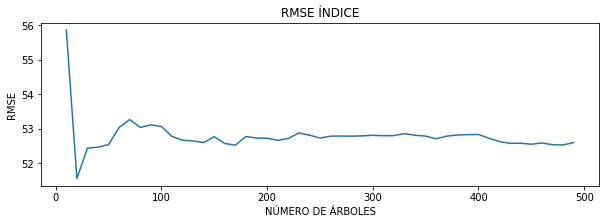

In [60]:
plt.figure(figsize=(10,3))
plt.title('RMSE ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('RMSE')
sns.lineplot(x = random_tree, y = rmse)

## MAE:

<AxesSubplot:title={'center':'MAE ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='MAE'>

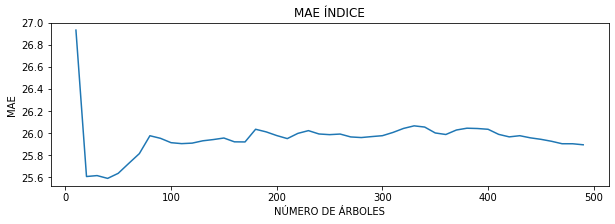

In [61]:
plt.figure(figsize=(10,3))
plt.title('MAE ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('MAE')
sns.lineplot(x = random_tree, y = mae)

## MAPE:


<AxesSubplot:title={'center':'MAPE ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='MAPE'>

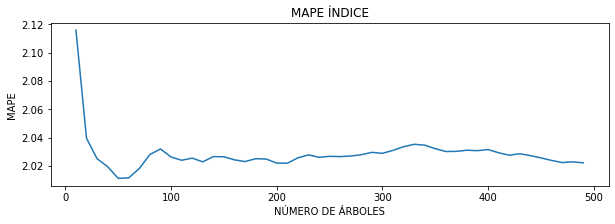

In [62]:
plt.figure(figsize=(10,3))
plt.title('MAPE ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('MAPE')
sns.lineplot(x = random_tree, y = mape)

## R2 SQUARE:

<AxesSubplot:title={'center':'R2 ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='r2'>

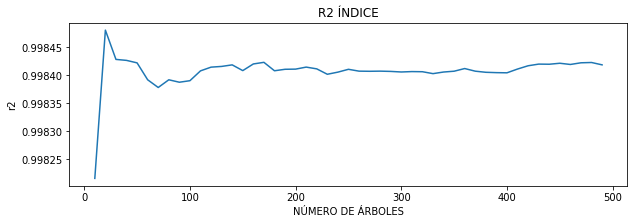

In [63]:
plt.figure(figsize=(10,3))
plt.title('R2 ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('r2')
sns.lineplot(x = random_tree, y = r_sq)

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [65]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500)]

max_features = ['auto', 'sqrt', None]

max_depth = [int(x) for x in np.linspace(5, 50, num = 45)]

max_depth.append(None)

min_samples_split = [2, 4, 6, 8, 10]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30]

bootstrap = [True]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' :  min_samples_leaf,
               'bootstrap' : bootstrap}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt', None], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, None], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30], 'bootstrap': [True]}


In [66]:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring = 'neg_mean_squared_error',
                               cv= 3, verbose = 2, random_state = 42, n_jobs =-1,
                               return_train_score = False)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'max_features': ['auto', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12, 14, 16, 20, 25,
                                                             30],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_es

## Cv nos da el nº de particiones para la cross validation. Cuanto mayor es el nº de iteraciones(n_iter) mayor búsqueda de posibilidades.
## Cuanto mayor sea el cv, mayor reducción de overfitting.

## Con el parámetro "scoring" pretendemos que nos devuelva el menor RMSE posible.

In [67]:
first_grid = rf_random.best_params_
first_grid

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True],
              'max_depth': [10, 15, 20],
              'max_features': ['auto'],
              'min_samples_leaf': [2, 4, 6],
              'min_samples_split': [5, 7, 9],
              'n_estimators' : [30, 190, 250]}


rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid= param_grid,
                           cv = 3, n_jobs = -1, verbose = 2, return_train_score = False, scoring = 'neg_mean_squared_error')

In [69]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 81 candidates, totalling 243 fits


## Nos quedamos con el modelo seleccionado del GridSearch que es el SecondGrid

In [70]:
modelo_seleccionado = grid_search.best_params_ 
modelo_seleccionado

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 250}

In [71]:
pred = modelo_seleccionado
pred

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 250}

In [ ]:
# QUEREMOS SACAR LA GRÁFICA TANTO DE LA PREDICCIÓN COMO DE SU VALOR REAL DEL CLOSE.
# plt.plot[[cardano_df['Close'], y_test(figsize= (20,8))]] 

<AxesSubplot:title={'center':'REAL VS PREDICCIONES'}, xlabel='FECHA', ylabel='PRECIO'>

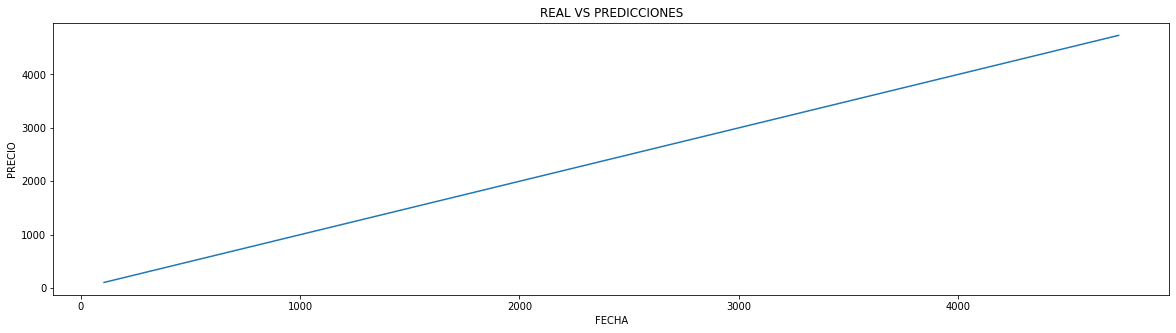

In [72]:
plt.figure(figsize=(20,5))
plt.title('REAL VS PREDICCIONES')
plt.xlabel('FECHA')
plt.ylabel('PRECIO')
sns.lineplot(x = ethereum_df['Close'], y = y_test)

<AxesSubplot:xlabel='Date'>

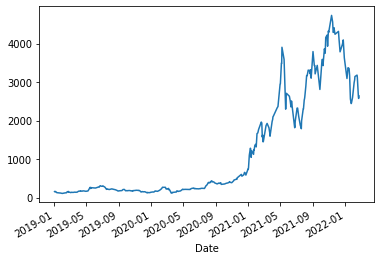

In [73]:
y_test.plot()

In [74]:
X_test

,Open,High,Low,Volume
Date,,,,
2021-07-28,2302.081299,2341.777832,2250.914062,1.899130e+10
2019-09-22,215.486557,216.086243,207.644928,7.812855e+09
2019-04-19,173.787888,173.978897,170.620209,6.541053e+09
2019-10-26,181.667068,195.942505,176.133804,1.383178e+10
2021-01-21,1382.684448,1382.684448,1098.476196,4.593246e+10
...,...,...,...,...
2020-10-15,379.192230,381.208771,371.354126,1.496418e+10
2021-05-22,2436.014648,2483.983154,2168.124268,4.208994e+10
2020-06-28,222.914490,228.598282,219.472672,6.205926e+09


In [75]:
y_test

Date
2021-07-28    2296.545410
2019-09-22     211.545380
2019-04-19     173.708435
2019-10-26     179.835480
2021-01-21    1121.570923
                 ...     
2020-10-15     377.441833
2021-05-22    2295.705566
2020-06-28     225.347168
2021-11-24    4239.981445
2021-09-07    3426.394287
Name: Close, Length: 347, dtype: float64